### DATASETS

In [ ]:
# [datasets]  https://data.mendeley.com/datasets/jxwvdwhpc2/1


## EDA DEL DATASETS

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## VISUALIZACION TIPOS DE CÁNCER

### Representación de una imagen por clase

In [ ]:
# import os
# import random

# # Carpeta principal donde están las imágenes
# base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"

# # Rutas de imágenes y sus etiquetas
# image_paths = []
# labels = []

# # Clases (nombres de carpetas)
# clases = set()

# for carpeta_grupo in os.listdir(base_path):
#     ruta_grupo = os.path.join(base_path, carpeta_grupo)
#     if not os.path.isdir(ruta_grupo):
#         continue  # Si no es carpeta, la saltamos

#     for nombre_clase in os.listdir(ruta_grupo):
#         ruta_clase = os.path.join(ruta_grupo, nombre_clase)
#         if os.path.isdir(ruta_clase):
#             clases.add(nombre_clase)

# clases = sorted(list(clases))
# print("Clases encontradas:", clases)

# # Creamos un número para cada clase
# class_map = {nombre: i for i, nombre in enumerate(clases)}

# # Guardar las imágenes de cada clase
# imagenes_por_clase = {}

# for carpeta_grupo in os.listdir(base_path):
#     ruta_grupo = os.path.join(base_path, carpeta_grupo)
#     if not os.path.isdir(ruta_grupo):
#         continue

#     for nombre_clase in os.listdir(ruta_grupo):
#         ruta_clase = os.path.join(ruta_grupo, nombre_clase)
#         if not os.path.isdir(ruta_clase):
#             continue

#         # Lista de imágenes de esta clase
#         imagenes = [
#             os.path.join(ruta_clase, img)
#             for img in os.listdir(ruta_clase)
#             if img.lower().endswith((".jpg", ".jpeg", ".png"))
#         ]

#         if nombre_clase not in imagenes_por_clase:
#             imagenes_por_clase[nombre_clase] = []

#         imagenes_por_clase[nombre_clase].extend(imagenes)

# # Mostrar cuántas imágenes tiene cada clase
# for clase, lista in imagenes_por_clase.items():
#     print(f"Clase '{clase}': {len(lista)} imágenes")

# # Encontrar la clase con menos imágenes (para balancear)
# minimo_imagenes = min(len(lista) for lista in imagenes_por_clase.values())
# print(f"\nNúmero mínimo de imágenes por clase: {minimo_imagenes}")

# # Seleccionar aleatoriamente el mismo número de imágenes de cada clase
# for clase, lista in imagenes_por_clase.items():
#     seleccionadas = random.sample(lista, minimo_imagenes)
#     # seleccionadas = random.sample(lista, 100)
#     image_paths.extend(seleccionadas)
#     labels.extend([class_map[clase]] * minimo_imagenes)
#     # labels.extend([class_map[clase]] * 100)

# # Verificación final
# print(f"\nTotal de imágenes seleccionadas: {len(image_paths)}")
# print(f"Total de etiquetas: {len(labels)}")

# for clase, idx in class_map.items():
#     cantidad = labels.count(idx)
#     print(f"Clase '{clase}': {cantidad} imágenes")


Clases encontradas: ['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']
Clase 'tubular_adenoma': 569 imágenes
Clase 'phyllodes_tumor': 453 imágenes
Clase 'ductal_carcinoma': 3460 imágenes
Clase 'lobular_carcinoma': 626 imágenes
Clase 'fibroadenoma': 1014 imágenes
Clase 'mucinous_carcinoma': 792 imágenes
Clase 'adenosis': 444 imágenes
Clase 'papillary_carcinoma': 560 imágenes

Número mínimo de imágenes por clase: 444

Total de imágenes seleccionadas: 3552
Total de etiquetas: 3552
Clase 'adenosis': 444 imágenes
Clase 'ductal_carcinoma': 444 imágenes
Clase 'fibroadenoma': 444 imágenes
Clase 'lobular_carcinoma': 444 imágenes
Clase 'mucinous_carcinoma': 444 imágenes
Clase 'papillary_carcinoma': 444 imágenes
Clase 'phyllodes_tumor': 444 imágenes
Clase 'tubular_adenoma': 444 imágenes


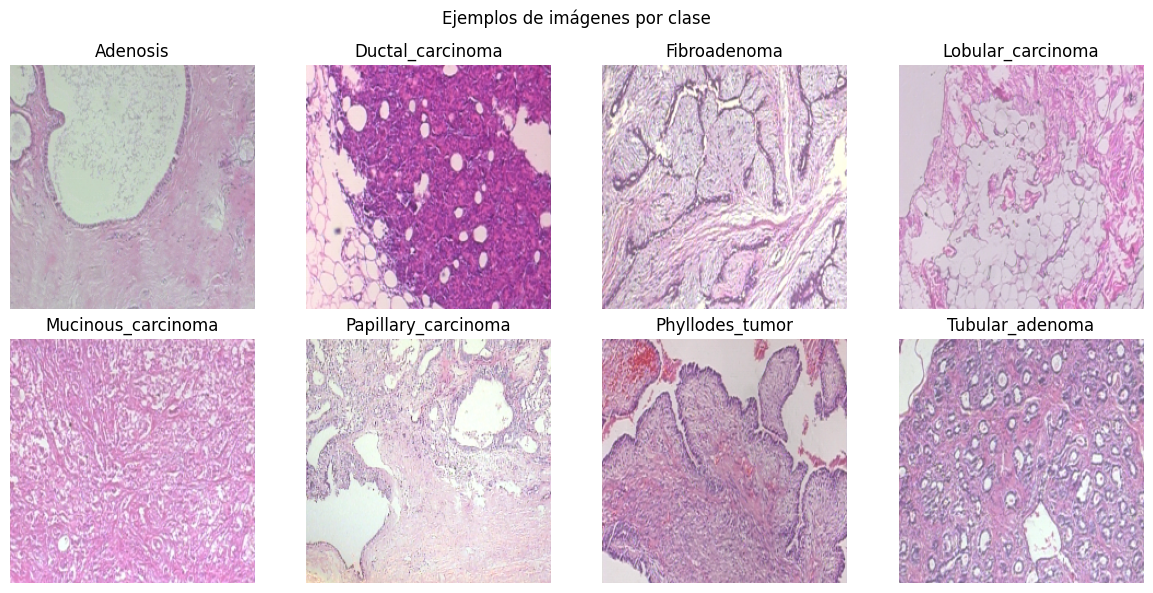

In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

# # Número de clases
# num_class = len(class_map)
# n_cols = 4
# n_rows = (num_class + n_cols - 1) // n_cols

# plt.figure(figsize=(n_cols * 3, n_rows * 3))

# # Recorrer cada clase por nombre
# for idx, class_name in enumerate(class_map.keys()):
#     class_path = None
#     for group in os.listdir(base_path):
#         group_path = os.path.join(base_path, group)
#         potential_path = os.path.join(group_path, class_name)
#         if os.path.isdir(potential_path):
#             class_path = potential_path
#             break

#     if class_path is None:
#         print(f"No se encontró carpeta para clase {class_name}")
#         continue

#     # Listar imágenes en esa carpeta
#     images = [
#         img for img in os.listdir(class_path)
#         if img.lower().endswith(('.jpg', '.jpeg', '.png'))
#     ]

#     if not images:
#         print(f"No hay imágenes en: {class_path}")
#         continue

#     # Imagen aleatoria
#     imagen_random = random.choice(images)
#     imagen_path = os.path.join(class_path, imagen_random)
#     # print(imagen_path)
#     imagen = Image.open(imagen_path)

#     plt.subplot(n_rows, n_cols, idx + 1)
#     plt.imshow(imagen)
#     plt.title(class_name.capitalize())
#     plt.axis('off')

# plt.suptitle("Ejemplos de imágenes por clase")
# plt.tight_layout()
# plt.show()


## MODELOS CNN

In [2]:
import os
import random
import torch

# ==============================
#  Configuración
# ==============================
base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# ==============================
# Crear lista de imágenes y etiquetas
# ==============================
image_paths = []
labels = []
clases = set()

for carpeta_grupo in os.listdir(base_path):
    ruta_grupo = os.path.join(base_path, carpeta_grupo)
    if not os.path.isdir(ruta_grupo):
        continue
    for nombre_clase in os.listdir(ruta_grupo):
        ruta_clase = os.path.join(ruta_grupo, nombre_clase)
        if os.path.isdir(ruta_clase):
            clases.add(nombre_clase)

clases = sorted(list(clases))
print("Clases encontradas:", clases)
class_map = {nombre: i for i, nombre in enumerate(clases)}

# Guardar imágenes por clase
imagenes_por_clase = {}
for carpeta_grupo in os.listdir(base_path):
    ruta_grupo = os.path.join(base_path, carpeta_grupo)
    if not os.path.isdir(ruta_grupo):
        continue
    for nombre_clase in os.listdir(ruta_grupo):
        ruta_clase = os.path.join(ruta_grupo, nombre_clase)
        if not os.path.isdir(ruta_clase):
            continue
        imagenes = [
            os.path.join(ruta_clase, img)
            for img in os.listdir(ruta_clase)
            if img.lower().endswith((".jpg", ".jpeg", ".png"))
        ]
        if nombre_clase not in imagenes_por_clase:
            imagenes_por_clase[nombre_clase] = []
        imagenes_por_clase[nombre_clase].extend(imagenes)

# Balancear dataset
minimo_imagenes = min(len(lista) for lista in imagenes_por_clase.values())
for clase, lista in imagenes_por_clase.items():
    seleccionadas = random.sample(lista, minimo_imagenes)
    image_paths.extend(seleccionadas)
    labels.extend([class_map[clase]] * minimo_imagenes)

# Verificación final
print(f"\nTotal de imágenes seleccionadas: {len(image_paths)}")
print(f"Total de etiquetas: {len(labels)}")

for clase, idx in class_map.items():
    cantidad = labels.count(idx)
    print(f"Clase '{clase}': {cantidad} imágenes")

Usando dispositivo: cuda
Clases encontradas: ['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']

Total de imágenes seleccionadas: 3552
Total de etiquetas: 3552
Clase 'adenosis': 444 imágenes
Clase 'ductal_carcinoma': 444 imágenes
Clase 'fibroadenoma': 444 imágenes
Clase 'lobular_carcinoma': 444 imágenes
Clase 'mucinous_carcinoma': 444 imágenes
Clase 'papillary_carcinoma': 444 imágenes
Clase 'phyllodes_tumor': 444 imágenes
Clase 'tubular_adenoma': 444 imágenes


In [3]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torchvision.transforms as transforms
import torch
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# ==============================
# Codificar etiquetas y split train/test
# ==============================
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, stratify=labels_encoded, random_state=42
)
num_classes = len(le.classes_)
print(f"Número de clases: {num_classes}")

# ==============================
# Transformaciones
# ==============================

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])


# Cargar y transformar imágenes para train
train_images_ntf = []
for path in tqdm(train_image_paths):
    img = Image.open(path).convert("RGB")
    img_ntf = transform(img)
    train_images_ntf.append(img_ntf)

# Cargar y transformar imágenes para test
test_images_ntf = []
for path in tqdm(test_image_paths):
    img = Image.open(path).convert("RGB")
    img_ntf = transform(img)
    test_images_ntf.append(img_ntf)


Número de clases: 8


100%|██████████| 711/711 [07:07<00:00,  1.66it/s]


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# ==================================
# Convertir listas a tensores
# ==================================
# ---------------------  SIN Transformaciones  ------------------------
X_train_tensor_ntf = torch.stack(train_images_ntf)
y_train_tensor_ntf = torch.tensor(train_labels, dtype=torch.long)

X_test_tensor_ntf = torch.stack(test_images_ntf)
y_test_tensor_ntf = torch.tensor(test_labels, dtype=torch.long)

# ==================================
# Crear datasets y dataloaders
# ==================================
train_dataset_ntf = TensorDataset(X_train_tensor_ntf, y_train_tensor_ntf)
test_dataset_ntf = TensorDataset(X_test_tensor_ntf, y_test_tensor_ntf)

train_loader_16_ntf = DataLoader(train_dataset_ntf, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
test_loader_16_ntf = DataLoader(test_dataset_ntf, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

train_loader_32_ntf = DataLoader(train_dataset_ntf, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_loader_32_ntf= DataLoader(test_dataset_ntf, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

Usando dispositivo: cuda


## MODEL AlexNet

### PRUEBA 1a: Dataloader, SIN DATA-AUGMENTATION, CON FINE TUNINIG, batch= 32 OK

In [30]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True


# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_32_ntf, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_32_ntf)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_32_ntf, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_32_ntf)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.4608, Test Loss=1.0113, Test Acc=0.6217


Epoch 2: Train Loss=0.8599, Test Loss=0.8457, Test Acc=0.6835


Epoch 3: Train Loss=0.5632, Test Loss=0.6150, Test Acc=0.7637


Epoch 4: Train Loss=0.3965, Test Loss=0.6314, Test Acc=0.7679


Epoch 5: Train Loss=0.2352, Test Loss=0.5955, Test Acc=0.7806


Epoch 6: Train Loss=0.2109, Test Loss=0.5602, Test Acc=0.8143


Epoch 7: Train Loss=0.1103, Test Loss=0.5729, Test Acc=0.8326


Epoch 8: Train Loss=0.1084, Test Loss=0.6202, Test Acc=0.8214


Epoch 9: Train Loss=0.0646, Test Loss=0.7449, Test Acc=0.8073
🛑 Early stopping en epoch 9


<All keys matched successfully>

In [31]:
# Prueba 1
true_labels_alexnet_1a = true_labels_list
pred_labels_alexnet_1a = pred_labels_list
prob_alexnet_1a = prob_list

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_1a = accuracy_score(true_labels_alexnet_1a, pred_labels_alexnet_1a)
error_rate_alexnet_1a = 1 - acc_alexnet_1a
print(f"Accuracy total: {acc_alexnet_1a:.4f}, Error rate: {error_rate_alexnet_1a:.4f}\n")

print(classification_report(
    true_labels_alexnet_1a,
    pred_labels_alexnet_1a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8073, Error rate: 0.1927

                     precision    recall  f1-score   support

           adenosis       0.74      0.98      0.84        89
   ductal_carcinoma       0.76      0.77      0.76        88
       fibroadenoma       0.73      0.58      0.65        89
  lobular_carcinoma       0.88      0.82      0.85        89
 mucinous_carcinoma       0.82      0.76      0.79        89
papillary_carcinoma       0.93      0.83      0.88        89
    phyllodes_tumor       0.83      0.80      0.81        89
    tubular_adenoma       0.81      0.91      0.86        89

           accuracy                           0.81       711
          macro avg       0.81      0.81      0.80       711
       weighted avg       0.81      0.81      0.80       711



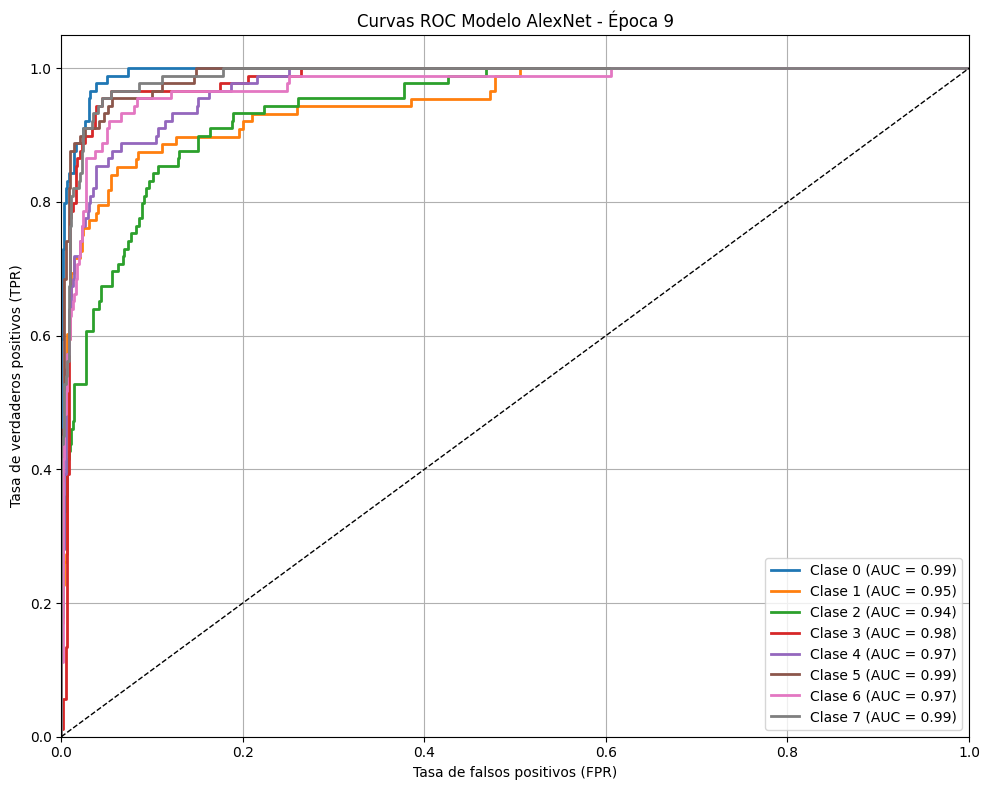

In [33]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_1a, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_1a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


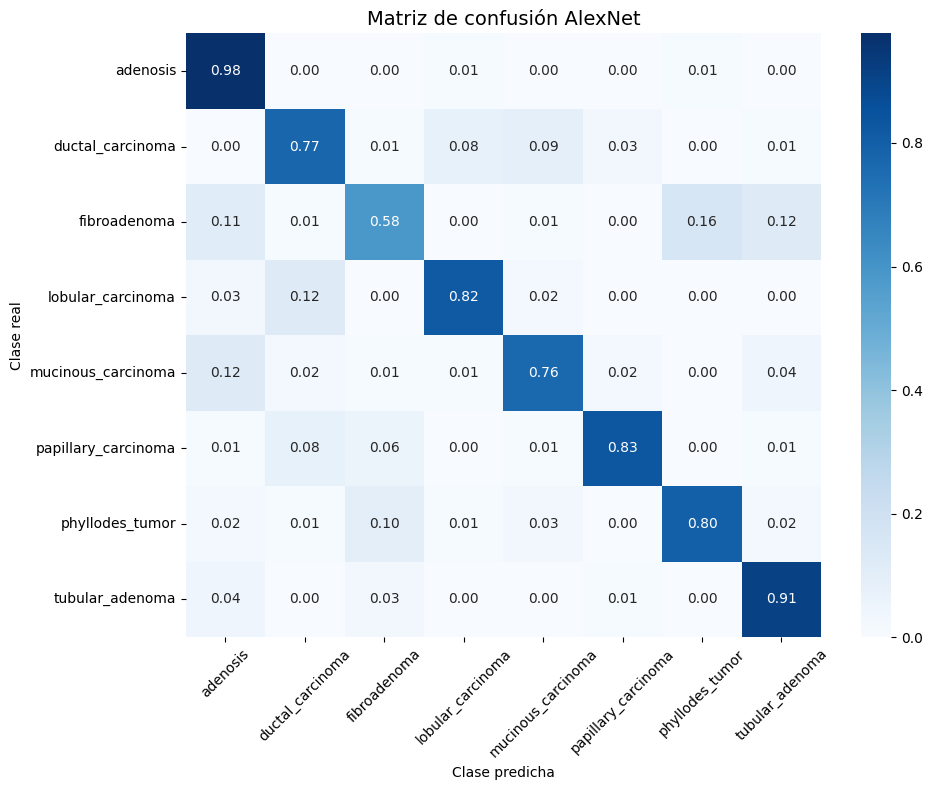

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_1a, pred_labels_alexnet_1a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 1b: Dataloader, SIN DATA-AUGMENTATION, CON FINE TUNINIG, batch= 16 OK

In [25]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
# Se optimizan todas las capas
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_16_ntf, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_16_ntf)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_16_ntf, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_16_ntf)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.3988, Test Loss=1.1293, Test Acc=0.5767


Epoch 2: Train Loss=0.8608, Test Loss=0.6570, Test Acc=0.7539


Epoch 3: Train Loss=0.5798, Test Loss=0.6222, Test Acc=0.7665


Epoch 4: Train Loss=0.4066, Test Loss=0.6131, Test Acc=0.7792


Epoch 5: Train Loss=0.2536, Test Loss=0.6983, Test Acc=0.7609


Epoch 6: Train Loss=0.2020, Test Loss=0.7022, Test Acc=0.7679


Epoch 7: Train Loss=0.1389, Test Loss=0.6874, Test Acc=0.8186
🛑 Early stopping en epoch 7


<All keys matched successfully>

In [26]:
# Prueba 1
true_labels_alexnet_1b = true_labels_list
pred_labels_alexnet_1b = pred_labels_list
prob_alexnet_1b = prob_list

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_1b = accuracy_score(true_labels_alexnet_1b, pred_labels_alexnet_1b)
error_rate_alexnet_1b = 1 - acc_alexnet_1b
print(f"Accuracy total: {acc_alexnet_1b:.4f}, Error rate: {error_rate_alexnet_1b:.4f}\n")

print(classification_report(
    true_labels_alexnet_1b,
    pred_labels_alexnet_1b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8186, Error rate: 0.1814

                     precision    recall  f1-score   support

           adenosis       0.78      0.98      0.87        89
   ductal_carcinoma       0.73      0.72      0.72        88
       fibroadenoma       0.78      0.65      0.71        89
  lobular_carcinoma       0.86      0.79      0.82        89
 mucinous_carcinoma       0.74      0.82      0.78        89
papillary_carcinoma       0.92      0.85      0.88        89
    phyllodes_tumor       0.80      0.88      0.84        89
    tubular_adenoma       0.96      0.87      0.91        89

           accuracy                           0.82       711
          macro avg       0.82      0.82      0.82       711
       weighted avg       0.82      0.82      0.82       711



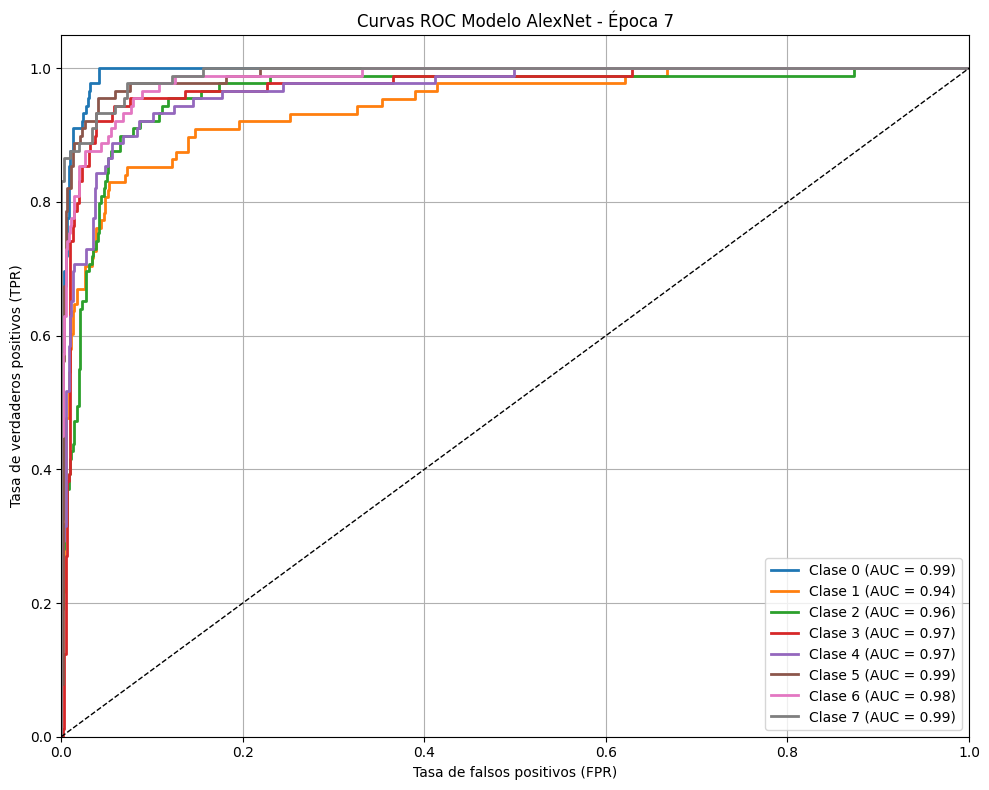

In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_1b, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_1b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


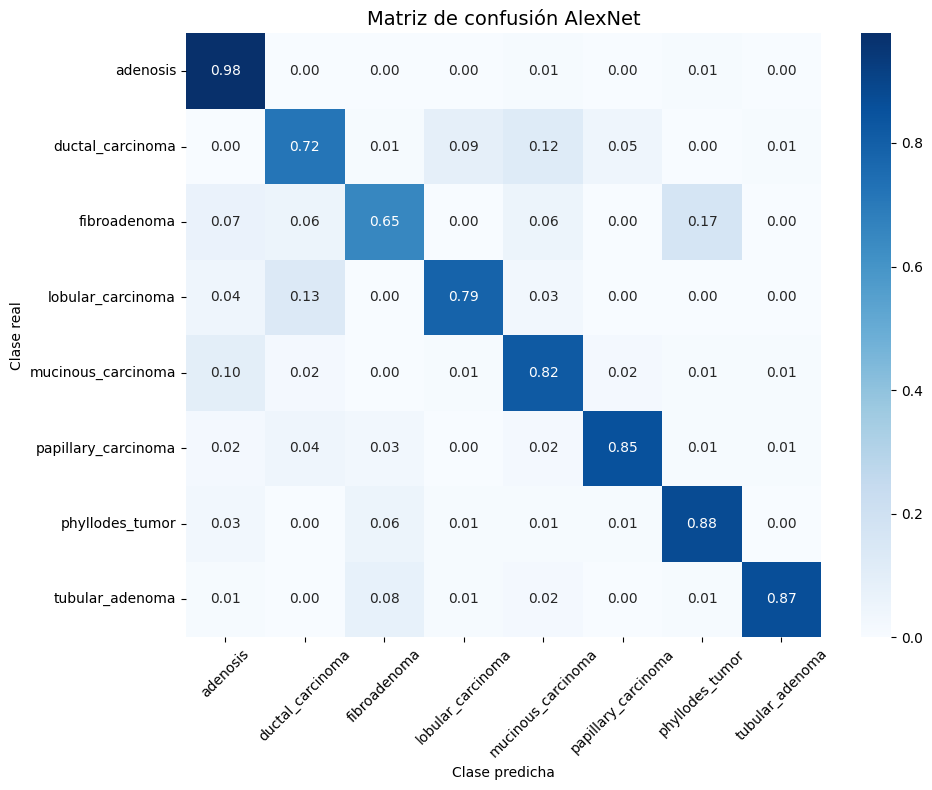

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_1b, pred_labels_alexnet_1b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 2a: Dataloader, SIN DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 32 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_32_ntf, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_32_ntf)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_32_ntf, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_32_ntf)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.8911, Test Loss=1.6911, Test Acc=0.4093


Epoch 2: Train Loss=1.6035, Test Loss=1.5202, Test Acc=0.4655


Epoch 3: Train Loss=1.4677, Test Loss=1.4230, Test Acc=0.5007


Epoch 4: Train Loss=1.3856, Test Loss=1.3560, Test Acc=0.5359


Epoch 5: Train Loss=1.3308, Test Loss=1.3063, Test Acc=0.5345


Epoch 6: Train Loss=1.2787, Test Loss=1.2638, Test Acc=0.5682


Epoch 7: Train Loss=1.2440, Test Loss=1.2267, Test Acc=0.5949


Epoch 8: Train Loss=1.2124, Test Loss=1.1944, Test Acc=0.6006


Epoch 9: Train Loss=1.1812, Test Loss=1.1707, Test Acc=0.5977


Epoch 10: Train Loss=1.1501, Test Loss=1.1490, Test Acc=0.6090


Epoch 11: Train Loss=1.1368, Test Loss=1.1276, Test Acc=0.6203


Epoch 12: Train Loss=1.1201, Test Loss=1.1084, Test Acc=0.6188


Epoch 13: Train Loss=1.0874, Test Loss=1.0869, Test Acc=0.6315


Epoch 14: Train Loss=1.0754, Test Loss=1.0719, Test Acc=0.6428


Epoch 15: Train Loss=1.0673, Test Loss=1.0702, Test Acc=0.6442


Epoch 16: Train Loss=1.0468, Test Loss=1.0536, Test Acc=0.6399


Epoch 17: Train Loss=1.0381, Test Loss=1.0491, Test Acc=0.6470


Epoch 18: Train Loss=1.0130, Test Loss=1.0264, Test Acc=0.6596


Epoch 19: Train Loss=1.0121, Test Loss=1.0232, Test Acc=0.6540


Epoch 20: Train Loss=0.9977, Test Loss=1.0180, Test Acc=0.6624


Epoch 21: Train Loss=0.9745, Test Loss=1.0064, Test Acc=0.6667


Epoch 22: Train Loss=0.9685, Test Loss=0.9941, Test Acc=0.6681


Epoch 23: Train Loss=0.9668, Test Loss=0.9901, Test Acc=0.6653


Epoch 24: Train Loss=0.9757, Test Loss=0.9841, Test Acc=0.6723


Epoch 25: Train Loss=0.9587, Test Loss=0.9778, Test Acc=0.6765


Epoch 26: Train Loss=0.9355, Test Loss=0.9723, Test Acc=0.6723


Epoch 27: Train Loss=0.9342, Test Loss=0.9771, Test Acc=0.6681


Epoch 28: Train Loss=0.9181, Test Loss=0.9559, Test Acc=0.6892


Epoch 29: Train Loss=0.9151, Test Loss=0.9626, Test Acc=0.6906


Epoch 30: Train Loss=0.9143, Test Loss=0.9470, Test Acc=0.6962


Epoch 31: Train Loss=0.9143, Test Loss=0.9476, Test Acc=0.6864


Epoch 32: Train Loss=0.8890, Test Loss=0.9385, Test Acc=0.6850


Epoch 33: Train Loss=0.8937, Test Loss=0.9416, Test Acc=0.6835


Epoch 34: Train Loss=0.8836, Test Loss=0.9357, Test Acc=0.6948


Epoch 35: Train Loss=0.8688, Test Loss=0.9265, Test Acc=0.7032


Epoch 36: Train Loss=0.8746, Test Loss=0.9333, Test Acc=0.6892


Epoch 37: Train Loss=0.8668, Test Loss=0.9230, Test Acc=0.7018


Epoch 38: Train Loss=0.8728, Test Loss=0.9276, Test Acc=0.6864


Epoch 39: Train Loss=0.8678, Test Loss=0.9169, Test Acc=0.6990


Epoch 40: Train Loss=0.8496, Test Loss=0.9162, Test Acc=0.6976


Epoch 41: Train Loss=0.8519, Test Loss=0.9044, Test Acc=0.7131


Epoch 42: Train Loss=0.8509, Test Loss=0.9056, Test Acc=0.7103


Epoch 43: Train Loss=0.8276, Test Loss=0.9018, Test Acc=0.6948


Epoch 44: Train Loss=0.8347, Test Loss=0.8989, Test Acc=0.7089


Epoch 45: Train Loss=0.8355, Test Loss=0.8955, Test Acc=0.7159


Epoch 46: Train Loss=0.8136, Test Loss=0.8983, Test Acc=0.7103


Epoch 47: Train Loss=0.8104, Test Loss=0.8944, Test Acc=0.7103


Epoch 48: Train Loss=0.8151, Test Loss=0.8890, Test Acc=0.7243


Epoch 49: Train Loss=0.8140, Test Loss=0.8857, Test Acc=0.7229


Epoch 50: Train Loss=0.8141, Test Loss=0.8889, Test Acc=0.7159


<All keys matched successfully>

In [ ]:
# Prueba 2
true_labels_alexnet_2a = true_labels_list
pred_labels_alexnet_2a = pred_labels_list
prob_alexnet_2a = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_2a = accuracy_score(true_labels_alexnet_2a, pred_labels_alexnet_2a)
error_rate_alexnet_2a = 1 - acc_alexnet_2a
print(f"Accuracy total: {acc_alexnet_2a:.4f}, Error rate: {error_rate_alexnet_2a:.4f}\n")

print(classification_report(
    true_labels_alexnet_2a,
    pred_labels_alexnet_2a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.7159, Error rate: 0.2841

                     precision    recall  f1-score   support

           adenosis       0.79      0.91      0.85        89
   ductal_carcinoma       0.58      0.64      0.61        88
       fibroadenoma       0.83      0.27      0.41        89
  lobular_carcinoma       0.56      0.83      0.67        89
 mucinous_carcinoma       0.83      0.44      0.57        89
papillary_carcinoma       0.67      0.71      0.69        89
    phyllodes_tumor       0.66      0.84      0.74        89
    tubular_adenoma       0.80      0.88      0.84        89

           accuracy                           0.69       711
          macro avg       0.72      0.69      0.67       711
       weighted avg       0.72      0.69      0.67       711



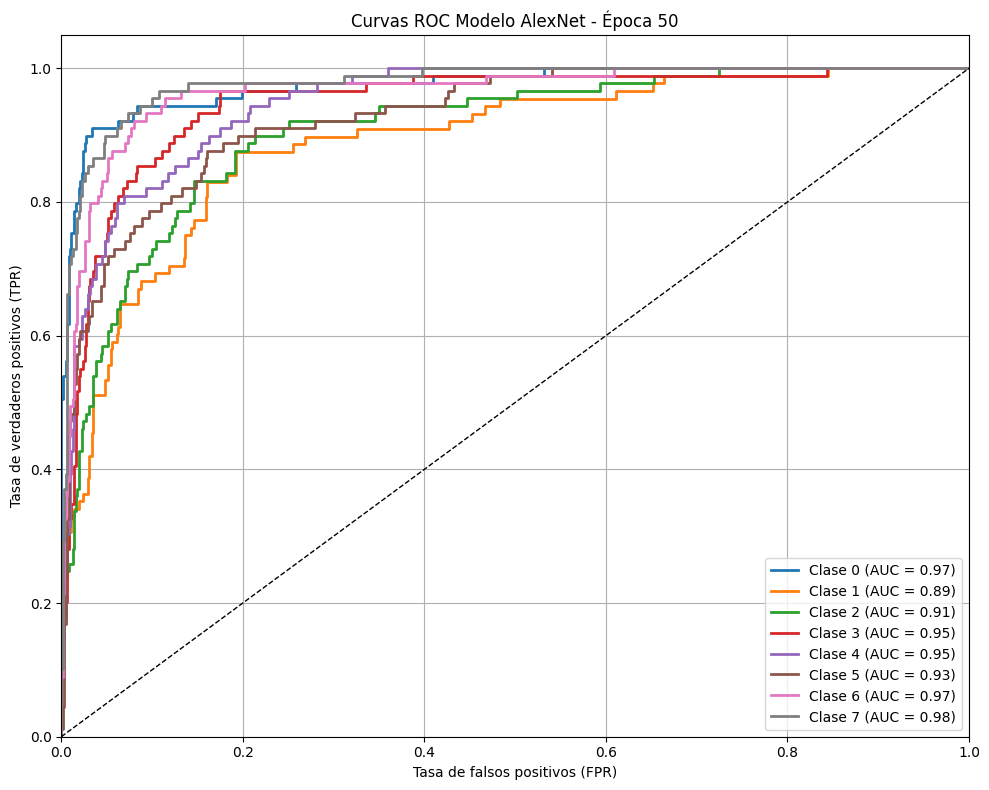

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_2a, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_2a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


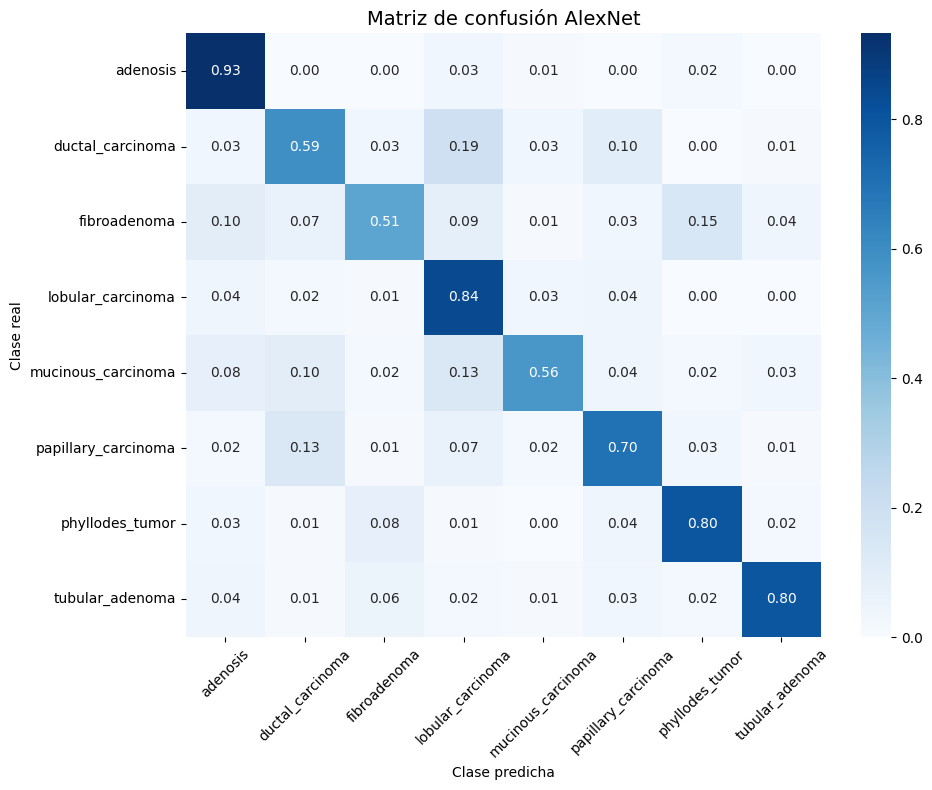

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_2a, pred_labels_alexnet_2a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### PRUEBA 2b: Dataloader, SIN DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 16 OK

In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=1e-4)
# optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento dataloader + Evaluación
# ==============================================================================
epochs = 50

for epoch in range(epochs):
    # ============================== Entrenamiento =============================
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_16_ntf, desc=f"Epoch {epoch+1} [Train]", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_16_ntf)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(test_loader_16_ntf, desc=f"Epoch {epoch+1} [Test]", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Pérdida para early stopping
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Probabilidades y predicciones
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            # Guardar para métricas finales
            true_labels_list.extend(labels.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            # Accuracy temporal
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(test_loader_16_ntf)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.8799, Test Loss=1.6448, Test Acc=0.4346


Epoch 2: Train Loss=1.5504, Test Loss=1.4591, Test Acc=0.4782


Epoch 3: Train Loss=1.4054, Test Loss=1.3575, Test Acc=0.5331


Epoch 4: Train Loss=1.3217, Test Loss=1.2899, Test Acc=0.5640


Epoch 5: Train Loss=1.2526, Test Loss=1.2339, Test Acc=0.5851


Epoch 6: Train Loss=1.2050, Test Loss=1.1873, Test Acc=0.6020


Epoch 7: Train Loss=1.1714, Test Loss=1.1561, Test Acc=0.6132


Epoch 8: Train Loss=1.1308, Test Loss=1.1363, Test Acc=0.6104


Epoch 9: Train Loss=1.1011, Test Loss=1.1120, Test Acc=0.6188


Epoch 10: Train Loss=1.0748, Test Loss=1.0784, Test Acc=0.6399


Epoch 11: Train Loss=1.0472, Test Loss=1.0600, Test Acc=0.6442


Epoch 12: Train Loss=1.0554, Test Loss=1.0500, Test Acc=0.6470


Epoch 13: Train Loss=1.0192, Test Loss=1.0440, Test Acc=0.6442


Epoch 14: Train Loss=0.9885, Test Loss=1.0200, Test Acc=0.6695


Epoch 15: Train Loss=0.9977, Test Loss=1.0059, Test Acc=0.6624


Epoch 16: Train Loss=0.9791, Test Loss=0.9923, Test Acc=0.6624


Epoch 17: Train Loss=0.9779, Test Loss=0.9809, Test Acc=0.6667


Epoch 18: Train Loss=0.9387, Test Loss=0.9711, Test Acc=0.6864


Epoch 19: Train Loss=0.9362, Test Loss=0.9746, Test Acc=0.6793


Epoch 20: Train Loss=0.9336, Test Loss=0.9674, Test Acc=0.6723


Epoch 21: Train Loss=0.9232, Test Loss=0.9523, Test Acc=0.6892


Epoch 22: Train Loss=0.9085, Test Loss=0.9512, Test Acc=0.6962


Epoch 23: Train Loss=0.9091, Test Loss=0.9469, Test Acc=0.6920


Epoch 24: Train Loss=0.8971, Test Loss=0.9504, Test Acc=0.6835


Epoch 25: Train Loss=0.8827, Test Loss=0.9352, Test Acc=0.6934


Epoch 26: Train Loss=0.8795, Test Loss=0.9392, Test Acc=0.6793


Epoch 27: Train Loss=0.8684, Test Loss=0.9150, Test Acc=0.7075


Epoch 28: Train Loss=0.8668, Test Loss=0.9239, Test Acc=0.6948


Epoch 29: Train Loss=0.8494, Test Loss=0.9324, Test Acc=0.6920


Epoch 30: Train Loss=0.8444, Test Loss=0.9081, Test Acc=0.7089


Epoch 31: Train Loss=0.8384, Test Loss=0.9045, Test Acc=0.7046


Epoch 32: Train Loss=0.8358, Test Loss=0.8984, Test Acc=0.7173


Epoch 33: Train Loss=0.8250, Test Loss=0.8978, Test Acc=0.7117


Epoch 34: Train Loss=0.8242, Test Loss=0.8904, Test Acc=0.7103


Epoch 35: Train Loss=0.8204, Test Loss=0.9005, Test Acc=0.7103


Epoch 36: Train Loss=0.8165, Test Loss=0.8909, Test Acc=0.7075


Epoch 37: Train Loss=0.8080, Test Loss=0.8844, Test Acc=0.7173


Epoch 38: Train Loss=0.8056, Test Loss=0.8806, Test Acc=0.7215


Epoch 39: Train Loss=0.7864, Test Loss=0.8850, Test Acc=0.6990


Epoch 40: Train Loss=0.7902, Test Loss=0.8693, Test Acc=0.7257


Epoch 41: Train Loss=0.7874, Test Loss=0.8667, Test Acc=0.7328


Epoch 42: Train Loss=0.7773, Test Loss=0.8822, Test Acc=0.7046


Epoch 43: Train Loss=0.7748, Test Loss=0.8736, Test Acc=0.7131


Epoch 44: Train Loss=0.7661, Test Loss=0.8819, Test Acc=0.6892
🛑 Early stopping en epoch 44


<All keys matched successfully>

In [ ]:
# Prueba 2
true_labels_alexnet_2b = true_labels_list
pred_labels_alexnet_2b = pred_labels_list
prob_alexnet_2b = prob_list

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_2b = accuracy_score(true_labels_alexnet_2b, pred_labels_alexnet_2b)
error_rate_alexnet_2b = 1 - acc_alexnet_2b
print(f"Accuracy total: {acc_alexnet_2b:.4f}, Error rate: {error_rate_alexnet_2b:.4f}\n")

print(classification_report(
    true_labels_alexnet_2b,
    pred_labels_alexnet_2b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6892, Error rate: 0.3108

                     precision    recall  f1-score   support

           adenosis       0.79      0.91      0.85        89
   ductal_carcinoma       0.58      0.64      0.61        88
       fibroadenoma       0.83      0.27      0.41        89
  lobular_carcinoma       0.56      0.83      0.67        89
 mucinous_carcinoma       0.83      0.44      0.57        89
papillary_carcinoma       0.67      0.71      0.69        89
    phyllodes_tumor       0.66      0.84      0.74        89
    tubular_adenoma       0.80      0.88      0.84        89

           accuracy                           0.69       711
          macro avg       0.72      0.69      0.67       711
       weighted avg       0.72      0.69      0.67       711



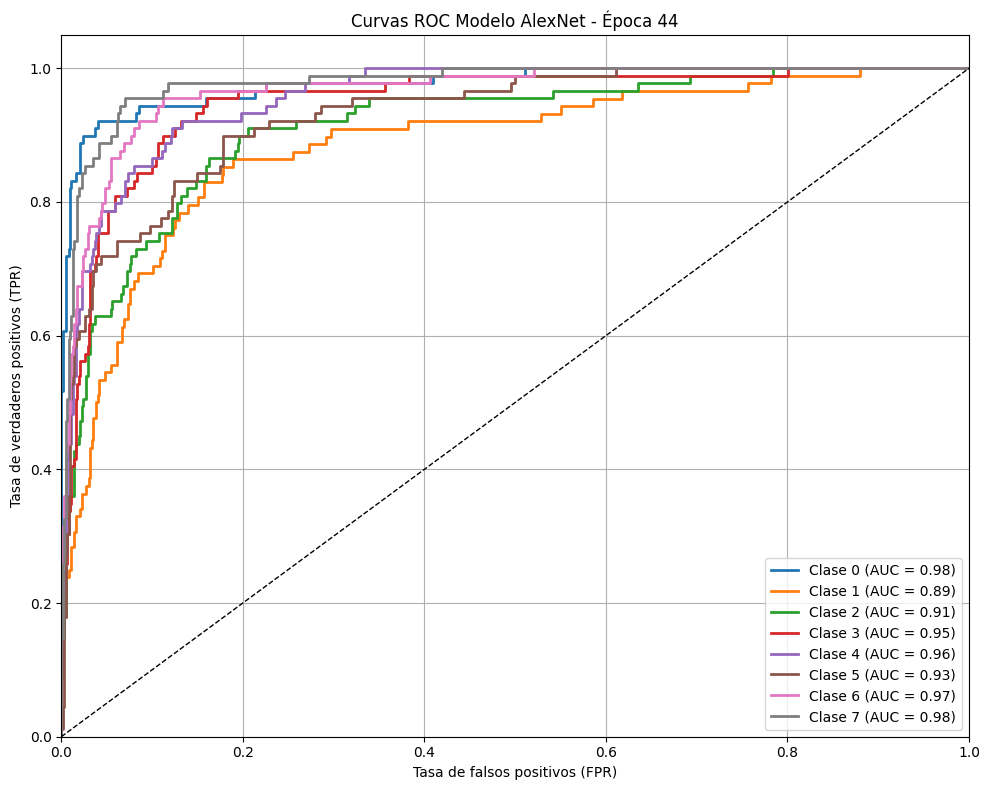

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_2b, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_2b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


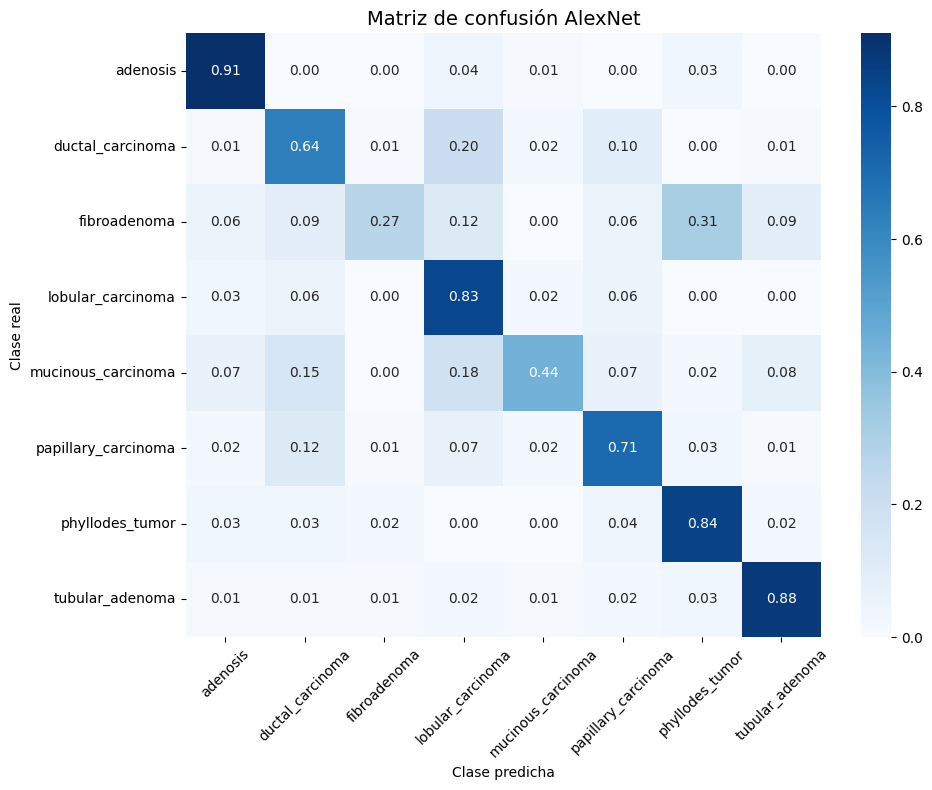

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_2b, pred_labels_alexnet_2b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### PRUEBA 3a: batch-loading, SIN DATA-AUGMENTATION, CON FINE TUNINIG, batch= 32 OK

In [5]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True


# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 32
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:02<00:00, 114MB/s] 


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.4435, Test Loss=0.9248, Test Acc=0.6695


Epoch 2: Train Loss=0.8584, Test Loss=1.0030, Test Acc=0.6090


Epoch 3: Train Loss=0.5714, Test Loss=0.6820, Test Acc=0.7707


Epoch 4: Train Loss=0.4552, Test Loss=0.6245, Test Acc=0.7764


Epoch 5: Train Loss=0.2416, Test Loss=0.5954, Test Acc=0.7862


Epoch 6: Train Loss=0.2127, Test Loss=0.6366, Test Acc=0.7792


Epoch 7: Train Loss=0.1314, Test Loss=0.5471, Test Acc=0.8200


Epoch 8: Train Loss=0.1144, Test Loss=0.5942, Test Acc=0.8256


Epoch 9: Train Loss=0.0668, Test Loss=0.5626, Test Acc=0.8411


Epoch 10: Train Loss=0.0632, Test Loss=0.6767, Test Acc=0.8101
🛑 Early stopping en epoch 10


<All keys matched successfully>

In [6]:
# Prueba 3
true_labels_alexnet_3a = true_labels_list
pred_labels_alexnet_3a = pred_labels_list
prob_alexnet_3a = prob_list

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_3a = accuracy_score(true_labels_alexnet_3a, pred_labels_alexnet_3a)
error_rate_alexnet_3a = 1 - acc_alexnet_3a
print(f"Accuracy total: {acc_alexnet_3a:.4f}, Error rate: {error_rate_alexnet_3a:.4f}\n")

print(classification_report(
    true_labels_alexnet_3a,
    pred_labels_alexnet_3a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.8101, Error rate: 0.1899

                     precision    recall  f1-score   support

           adenosis       0.91      0.93      0.92        89
   ductal_carcinoma       0.75      0.65      0.70        88
       fibroadenoma       0.71      0.74      0.73        89
  lobular_carcinoma       0.86      0.76      0.81        89
 mucinous_carcinoma       0.79      0.82      0.81        89
papillary_carcinoma       0.75      0.89      0.81        89
    phyllodes_tumor       0.79      0.80      0.79        89
    tubular_adenoma       0.93      0.89      0.91        89

           accuracy                           0.81       711
          macro avg       0.81      0.81      0.81       711
       weighted avg       0.81      0.81      0.81       711



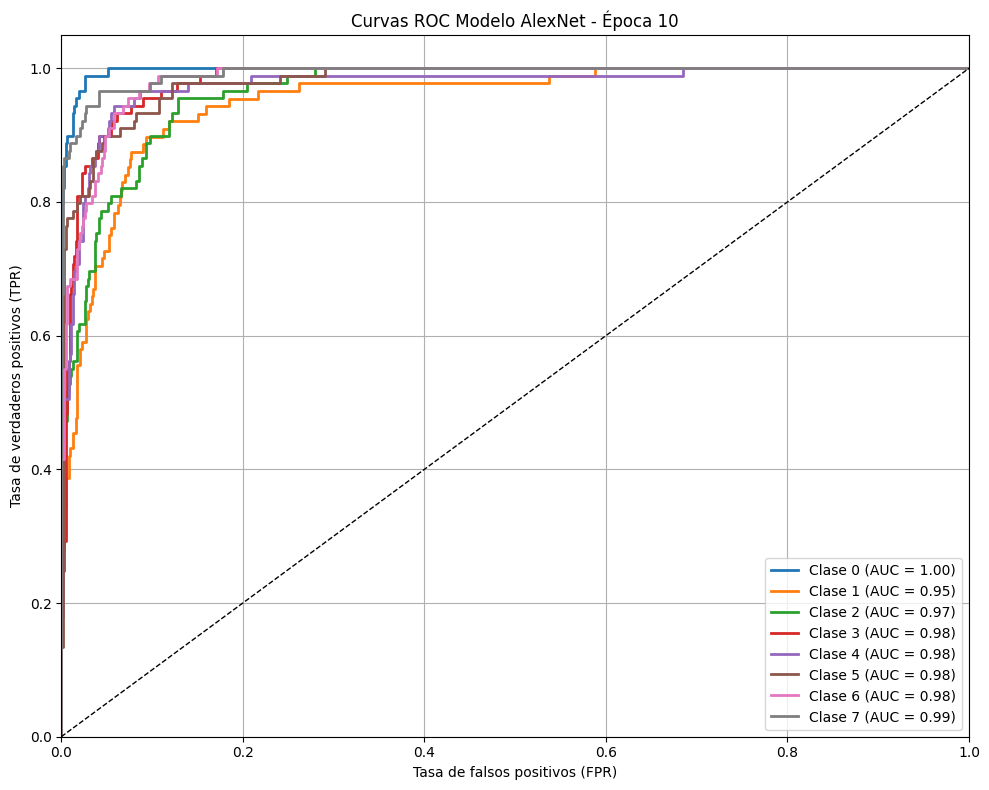

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_3a, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_3a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


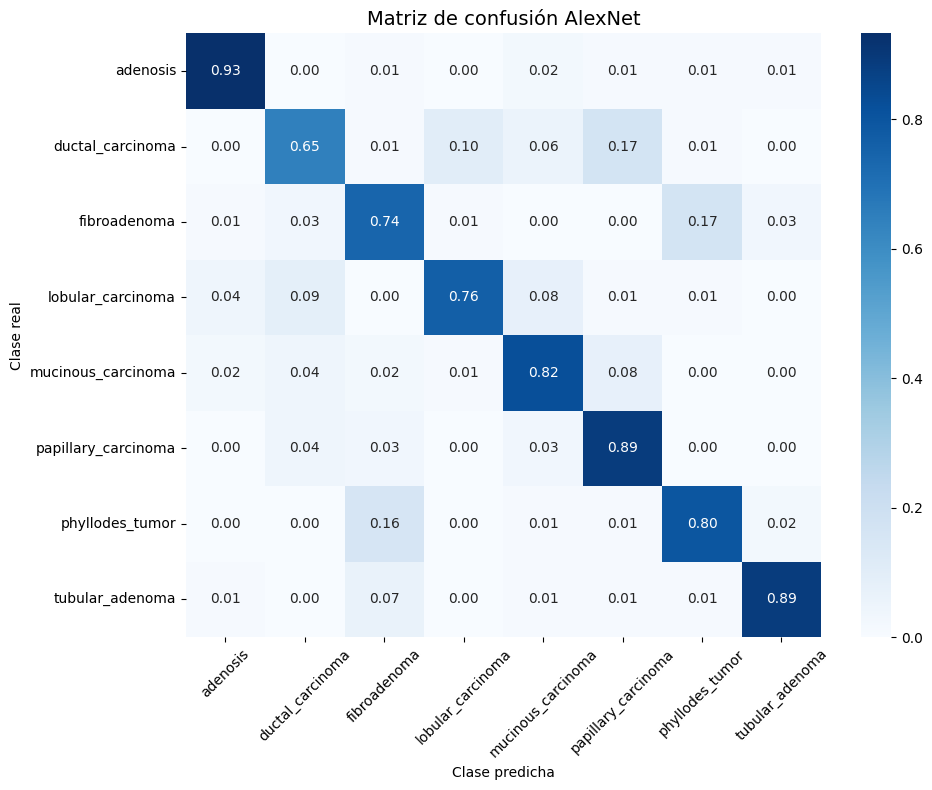

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_3a, pred_labels_alexnet_3a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 3b: batch-loading, SIN DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 32 OK

In [10]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 32
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.9277, Test Loss=1.7623, Test Acc=0.4135


Epoch 2: Train Loss=1.6224, Test Loss=1.5703, Test Acc=0.4951


Epoch 3: Train Loss=1.4684, Test Loss=1.4637, Test Acc=0.5443


Epoch 4: Train Loss=1.3894, Test Loss=1.3923, Test Acc=0.5485


Epoch 5: Train Loss=1.3252, Test Loss=1.3391, Test Acc=0.5612


Epoch 6: Train Loss=1.2615, Test Loss=1.3074, Test Acc=0.5668


Epoch 7: Train Loss=1.2272, Test Loss=1.2604, Test Acc=0.5893


Epoch 8: Train Loss=1.1902, Test Loss=1.2301, Test Acc=0.5851


Epoch 9: Train Loss=1.1662, Test Loss=1.2070, Test Acc=0.5935


Epoch 10: Train Loss=1.1258, Test Loss=1.1841, Test Acc=0.6118


Epoch 11: Train Loss=1.1104, Test Loss=1.1618, Test Acc=0.6034


Epoch 12: Train Loss=1.0861, Test Loss=1.1424, Test Acc=0.6203


Epoch 13: Train Loss=1.0682, Test Loss=1.1319, Test Acc=0.6174


Epoch 14: Train Loss=1.0513, Test Loss=1.1132, Test Acc=0.6203


Epoch 15: Train Loss=1.0260, Test Loss=1.1032, Test Acc=0.6259


Epoch 16: Train Loss=1.0180, Test Loss=1.0873, Test Acc=0.6315


Epoch 17: Train Loss=1.0054, Test Loss=1.0772, Test Acc=0.6329


Epoch 18: Train Loss=0.9793, Test Loss=1.0661, Test Acc=0.6399


Epoch 19: Train Loss=0.9842, Test Loss=1.0541, Test Acc=0.6428


Epoch 20: Train Loss=0.9728, Test Loss=1.0505, Test Acc=0.6301


Epoch 21: Train Loss=0.9580, Test Loss=1.0418, Test Acc=0.6554


Epoch 22: Train Loss=0.9387, Test Loss=1.0293, Test Acc=0.6428


Epoch 23: Train Loss=0.9354, Test Loss=1.0250, Test Acc=0.6470


Epoch 24: Train Loss=0.9331, Test Loss=1.0164, Test Acc=0.6568


Epoch 25: Train Loss=0.9092, Test Loss=1.0082, Test Acc=0.6653


Epoch 26: Train Loss=0.8935, Test Loss=1.0125, Test Acc=0.6610


Epoch 27: Train Loss=0.8995, Test Loss=0.9987, Test Acc=0.6582


Epoch 28: Train Loss=0.9100, Test Loss=0.9987, Test Acc=0.6568


Epoch 29: Train Loss=0.8906, Test Loss=0.9908, Test Acc=0.6596


Epoch 30: Train Loss=0.8865, Test Loss=0.9928, Test Acc=0.6596


Epoch 31: Train Loss=0.8802, Test Loss=0.9833, Test Acc=0.6695


Epoch 32: Train Loss=0.8630, Test Loss=0.9801, Test Acc=0.6709


Epoch 33: Train Loss=0.8662, Test Loss=0.9726, Test Acc=0.6695


Epoch 34: Train Loss=0.8687, Test Loss=0.9709, Test Acc=0.6737


Epoch 35: Train Loss=0.8487, Test Loss=0.9749, Test Acc=0.6765


Epoch 36: Train Loss=0.8337, Test Loss=0.9623, Test Acc=0.6723


Epoch 37: Train Loss=0.8330, Test Loss=0.9708, Test Acc=0.6723


Epoch 38: Train Loss=0.8340, Test Loss=0.9580, Test Acc=0.6779


Epoch 39: Train Loss=0.8373, Test Loss=0.9513, Test Acc=0.6695


Epoch 40: Train Loss=0.8235, Test Loss=0.9555, Test Acc=0.6723


Epoch 41: Train Loss=0.8190, Test Loss=0.9448, Test Acc=0.6751


Epoch 42: Train Loss=0.8086, Test Loss=0.9481, Test Acc=0.6765


Epoch 43: Train Loss=0.8144, Test Loss=0.9528, Test Acc=0.6864


Epoch 44: Train Loss=0.8027, Test Loss=0.9411, Test Acc=0.6864


Epoch 45: Train Loss=0.7845, Test Loss=0.9350, Test Acc=0.6906


Epoch 46: Train Loss=0.7940, Test Loss=0.9370, Test Acc=0.6807


Epoch 47: Train Loss=0.8087, Test Loss=0.9321, Test Acc=0.6850


Epoch 48: Train Loss=0.7872, Test Loss=0.9234, Test Acc=0.6835


Epoch 49: Train Loss=0.7826, Test Loss=0.9244, Test Acc=0.6821


Epoch 50: Train Loss=0.7730, Test Loss=0.9191, Test Acc=0.6878


<All keys matched successfully>

In [11]:
# Prueba 3
true_labels_alexnet_3b = true_labels_list
pred_labels_alexnet_3b = pred_labels_list
prob_alexnet_3b = prob_list

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_3b = accuracy_score(true_labels_alexnet_3b, pred_labels_alexnet_3b)
error_rate_alexnet_3b = 1 - acc_alexnet_3b
print(f"Accuracy total: {acc_alexnet_3b:.4f}, Error rate: {error_rate_alexnet_3b:.4f}\n")

print(classification_report(
    true_labels_alexnet_3b,
    pred_labels_alexnet_3b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6878, Error rate: 0.3122

                     precision    recall  f1-score   support

           adenosis       0.72      0.94      0.82        89
   ductal_carcinoma       0.72      0.48      0.58        88
       fibroadenoma       0.61      0.57      0.59        89
  lobular_carcinoma       0.61      0.88      0.72        89
 mucinous_carcinoma       0.67      0.53      0.59        89
papillary_carcinoma       0.70      0.75      0.72        89
    phyllodes_tumor       0.73      0.61      0.66        89
    tubular_adenoma       0.77      0.74      0.75        89

           accuracy                           0.69       711
          macro avg       0.69      0.69      0.68       711
       weighted avg       0.69      0.69      0.68       711



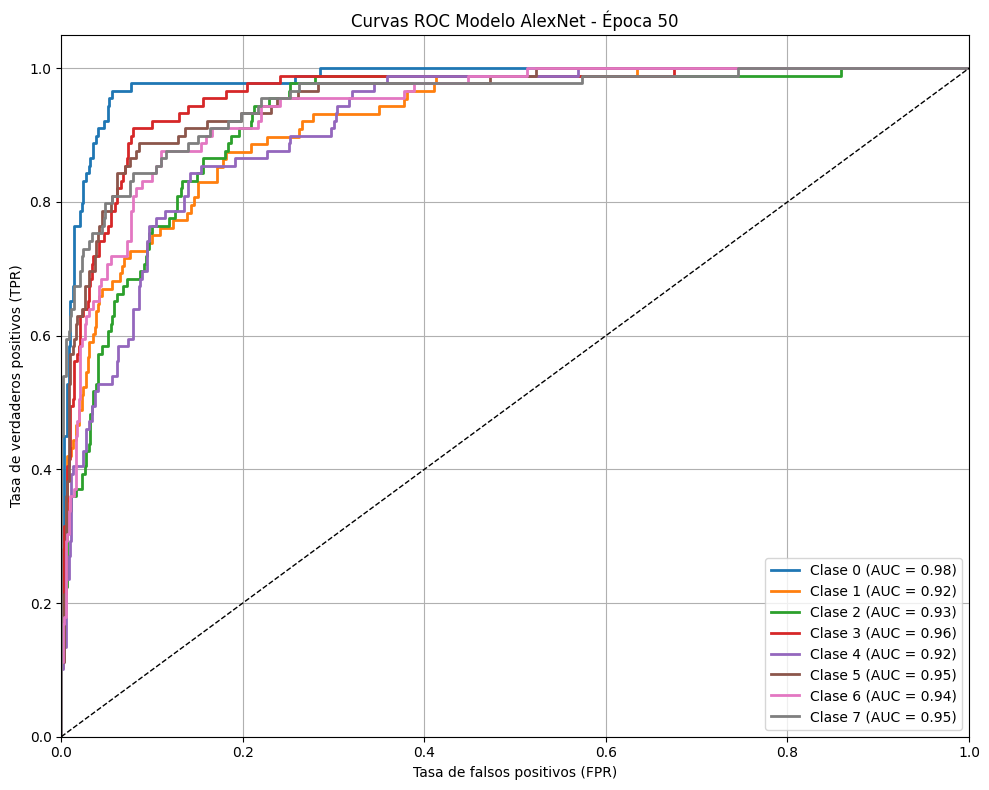

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_3b, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_3b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


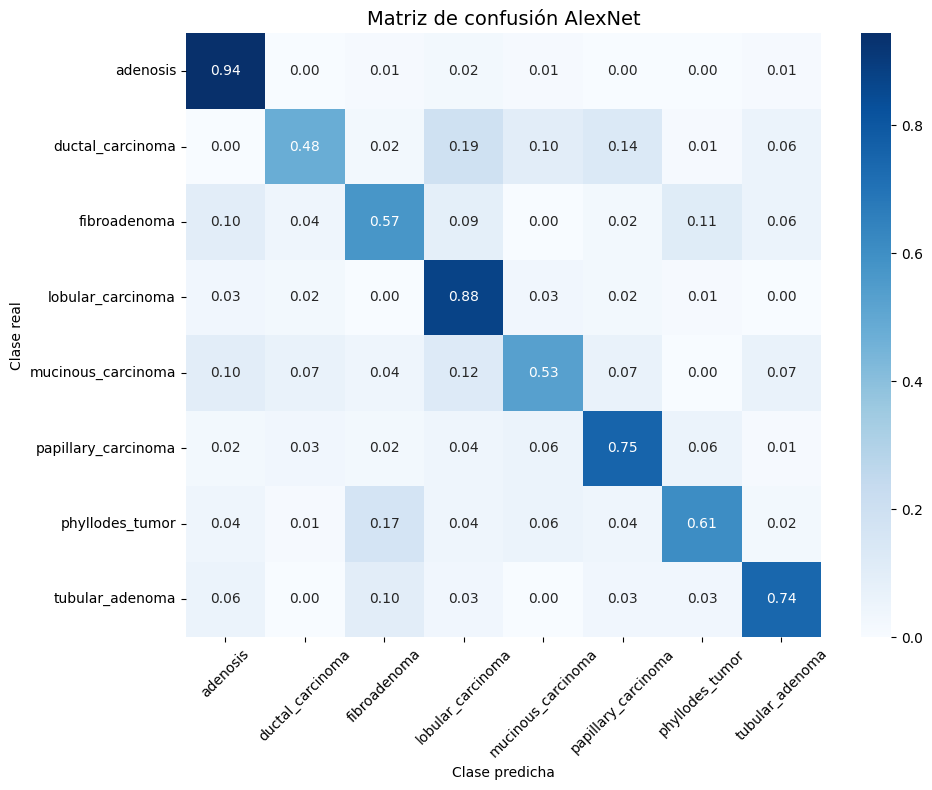

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_3b, pred_labels_alexnet_3b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 4a: batch-loading, SIN DATA-AUGMENTATION, SIN FINE TUNINIG, batch= 16 OK

In [15]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Sin fine-tuning (congelar capas convolucionales)
# ==============================================================================
# Solo las capas convolucionales
for param in model.features.parameters():
    param.requires_grad = False

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 16
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.8138, Test Loss=1.6066, Test Acc=0.4698


Epoch 2: Train Loss=1.5088, Test Loss=1.4381, Test Acc=0.5302


Epoch 3: Train Loss=1.3798, Test Loss=1.3406, Test Acc=0.5584


Epoch 4: Train Loss=1.2886, Test Loss=1.2719, Test Acc=0.5626


Epoch 5: Train Loss=1.2359, Test Loss=1.2238, Test Acc=0.5809


Epoch 6: Train Loss=1.1823, Test Loss=1.1929, Test Acc=0.5935


Epoch 7: Train Loss=1.1419, Test Loss=1.1567, Test Acc=0.6020


Epoch 8: Train Loss=1.1187, Test Loss=1.1249, Test Acc=0.6245


Epoch 9: Train Loss=1.0748, Test Loss=1.0992, Test Acc=0.6273


Epoch 10: Train Loss=1.0464, Test Loss=1.0795, Test Acc=0.6329


Epoch 11: Train Loss=1.0400, Test Loss=1.0715, Test Acc=0.6273


Epoch 12: Train Loss=1.0057, Test Loss=1.0629, Test Acc=0.6301


Epoch 13: Train Loss=0.9963, Test Loss=1.0354, Test Acc=0.6428


Epoch 14: Train Loss=0.9894, Test Loss=1.0310, Test Acc=0.6428


Epoch 15: Train Loss=0.9631, Test Loss=1.0159, Test Acc=0.6554


Epoch 16: Train Loss=0.9426, Test Loss=1.0086, Test Acc=0.6568


Epoch 17: Train Loss=0.9392, Test Loss=0.9925, Test Acc=0.6667


Epoch 18: Train Loss=0.9058, Test Loss=0.9989, Test Acc=0.6554


Epoch 19: Train Loss=0.9124, Test Loss=0.9838, Test Acc=0.6596


Epoch 20: Train Loss=0.9071, Test Loss=0.9693, Test Acc=0.6709


Epoch 21: Train Loss=0.8980, Test Loss=0.9672, Test Acc=0.6582


Epoch 22: Train Loss=0.8977, Test Loss=0.9685, Test Acc=0.6624


Epoch 23: Train Loss=0.8747, Test Loss=0.9495, Test Acc=0.6723


Epoch 24: Train Loss=0.8683, Test Loss=0.9448, Test Acc=0.6850


Epoch 25: Train Loss=0.8557, Test Loss=0.9481, Test Acc=0.6723


Epoch 26: Train Loss=0.8328, Test Loss=0.9429, Test Acc=0.6751


Epoch 27: Train Loss=0.8254, Test Loss=0.9331, Test Acc=0.6962


Epoch 28: Train Loss=0.8352, Test Loss=0.9376, Test Acc=0.6765


Epoch 29: Train Loss=0.8232, Test Loss=0.9321, Test Acc=0.6835


Epoch 30: Train Loss=0.8288, Test Loss=0.9223, Test Acc=0.6864


Epoch 31: Train Loss=0.8054, Test Loss=0.9156, Test Acc=0.6990


Epoch 32: Train Loss=0.7929, Test Loss=0.9203, Test Acc=0.6892


Epoch 33: Train Loss=0.7937, Test Loss=0.9189, Test Acc=0.6793


Epoch 34: Train Loss=0.7955, Test Loss=0.9167, Test Acc=0.6835
🛑 Early stopping en epoch 34


<All keys matched successfully>

In [16]:
# Prueba 4
true_labels_alexnet_4a = true_labels_list
pred_labels_alexnet_4a = pred_labels_list
prob_alexnet_4a = prob_list

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_4a = accuracy_score(true_labels_alexnet_4a, pred_labels_alexnet_4a)
error_rate_alexnet_4a = 1 - acc_alexnet_4a
print(f"Accuracy total: {acc_alexnet_4a:.4f}, Error rate: {error_rate_alexnet_4a:.4f}\n")

print(classification_report(
    true_labels_alexnet_4a,
    pred_labels_alexnet_4a,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.6835, Error rate: 0.3165

                     precision    recall  f1-score   support

           adenosis       0.79      0.90      0.84        89
   ductal_carcinoma       0.76      0.44      0.56        88
       fibroadenoma       0.66      0.47      0.55        89
  lobular_carcinoma       0.60      0.85      0.70        89
 mucinous_carcinoma       0.55      0.63      0.59        89
papillary_carcinoma       0.73      0.74      0.73        89
    phyllodes_tumor       0.73      0.67      0.70        89
    tubular_adenoma       0.71      0.75      0.73        89

           accuracy                           0.68       711
          macro avg       0.69      0.68      0.68       711
       weighted avg       0.69      0.68      0.68       711



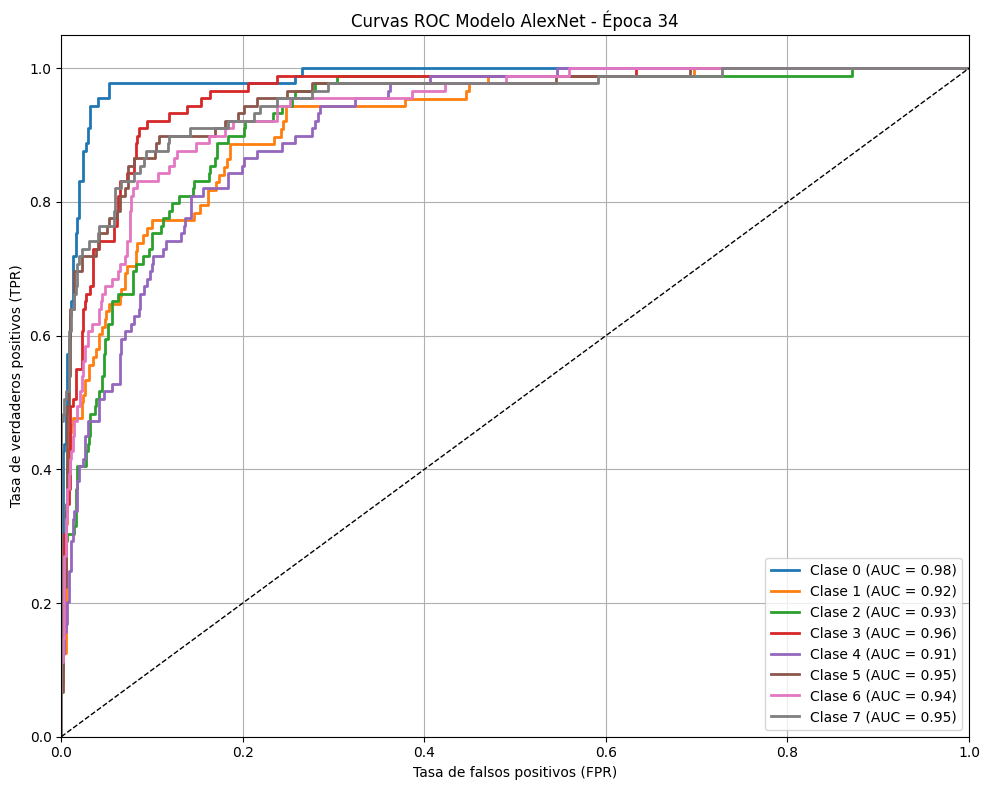

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_4a, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_4a)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


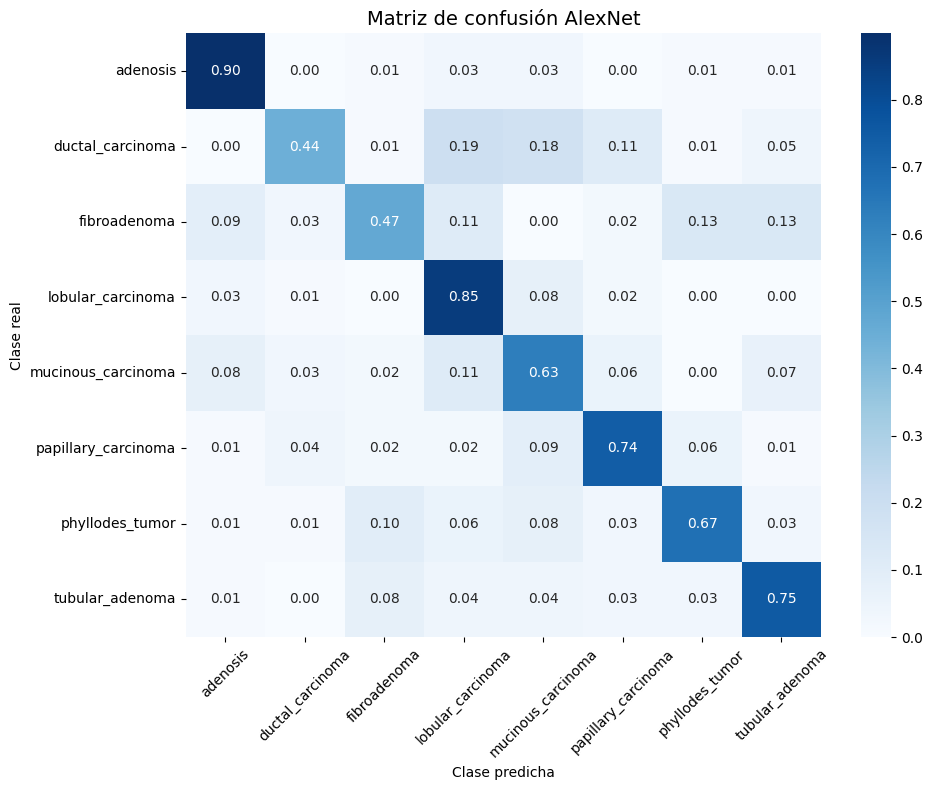

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_4a, pred_labels_alexnet_4a)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### PRUEBA 4b: batch-loading, SIN DATA-AUGMENTATION, CON FINE TUNINIG, batch= 16 OK

In [20]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from random import shuffle

# ==================================
# Modelo AlexNet preentrenado
# ==================================
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# ==============================================================================
# Fine-tuning completo (descongelar capas convolucionales)
# ==============================================================================
# Las capas están descongeladas y se entrenarán.
for param in model.parameters():
    param.requires_grad = True


# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")
model = model.to(device)

# ==============================================================================
# Función de pérdida y optimizador
# ==============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

# ==============================================================================
# Parámetros Early Stopping
# ==============================================================================
patience = 3
min_delta = 0.001
best_val_loss = float("inf")
patience_counter = 0
best_model_wts = None

# ==============================================================================
# Entrenamiento batch-loading + Evaluación
# ==============================================================================
batch_size = 16
epochs = 50

for epoch in range(epochs):
    # ============================= Entrenamiento ==============================
    model.train()
    running_loss = 0.0
    train_indices = list(range(len(train_image_paths)))
    shuffle(train_indices)

    for start_idx in tqdm(range(0, len(train_image_paths), batch_size), desc=f"Epoch {epoch+1} [Train]", leave=False):
        batch_indices = train_indices[start_idx:start_idx+batch_size]

        images, labels_batch = [], []
        for i in batch_indices:
            img = Image.open(train_image_paths[i]).convert("RGB")
            img = transform(img)
            images.append(img)
            labels_batch.append(train_labels[i])

        images_tensor = torch.stack(images).to(device)
        labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images_tensor)
        loss = criterion(outputs, labels_tensor)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / (len(train_image_paths) / batch_size)

    # =============================== Evaluación ===============================
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    true_labels_list, pred_labels_list, prob_list = [], [], []

    with torch.no_grad():
        for start_idx in tqdm(range(0, len(test_image_paths), batch_size), desc=f"Epoch {epoch+1} [Test]", leave=False):
            batch_indices = list(range(start_idx, min(start_idx+batch_size, len(test_image_paths))))

            images, labels_batch = [], []
            for i in batch_indices:
                img = Image.open(test_image_paths[i]).convert("RGB")
                img = transform(img)
                images.append(img)
                labels_batch.append(test_labels[i])

            images_tensor = torch.stack(images).to(device)
            labels_tensor = torch.tensor(labels_batch, dtype=torch.long).to(device)

            outputs = model(images_tensor)
            loss = criterion(outputs, labels_tensor)
            val_loss += loss.item()

            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            true_labels_list.extend(labels_tensor.cpu().numpy())
            pred_labels_list.extend(preds.cpu().numpy())
            prob_list.extend(probs.cpu().numpy())

            correct += (preds == labels_tensor).sum().item()
            total += labels_tensor.size(0)

    val_loss /= (len(test_image_paths) / batch_size)
    val_acc = correct / total
    print(f"\rEpoch {epoch+1}: Train Loss={train_loss:.4f}, Test Loss={val_loss:.4f}, Test Acc={val_acc:.4f}")

    # ============================= Early Stopping =============================
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"🛑 Early stopping en epoch {epoch+1}")
            break

# =========================
# Restaurar mejores pesos
# =========================
model.load_state_dict(best_model_wts)


Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)



Epoch 1: Train Loss=1.4338, Test Loss=1.0830, Test Acc=0.6034


Epoch 2: Train Loss=0.8565, Test Loss=0.7600, Test Acc=0.7103


Epoch 3: Train Loss=0.5505, Test Loss=0.5803, Test Acc=0.7806


Epoch 4: Train Loss=0.3648, Test Loss=0.6137, Test Acc=0.7637


Epoch 5: Train Loss=0.2554, Test Loss=0.6039, Test Acc=0.7764


Epoch 6: Train Loss=0.1759, Test Loss=0.7082, Test Acc=0.7581
🛑 Early stopping en epoch 6


<All keys matched successfully>

In [21]:
# Prueba 4
true_labels_alexnet_4b = true_labels_list
pred_labels_alexnet_4b = pred_labels_list
prob_alexnet_4b = prob_list

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_alexnet_4b = accuracy_score(true_labels_alexnet_4b, pred_labels_alexnet_4b)
error_rate_alexnet_4b = 1 - acc_alexnet_4b
print(f"Accuracy total: {acc_alexnet_4b:.4f}, Error rate: {error_rate_alexnet_4b:.4f}\n")

print(classification_report(
    true_labels_alexnet_4b,
    pred_labels_alexnet_4b,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

Accuracy total: 0.7581, Error rate: 0.2419

                     precision    recall  f1-score   support

           adenosis       0.98      0.63      0.77        89
   ductal_carcinoma       0.60      0.82      0.69        88
       fibroadenoma       0.69      0.69      0.69        89
  lobular_carcinoma       0.79      0.78      0.78        89
 mucinous_carcinoma       0.65      0.74      0.69        89
papillary_carcinoma       0.86      0.88      0.87        89
    phyllodes_tumor       0.75      0.76      0.76        89
    tubular_adenoma       0.92      0.78      0.84        89

           accuracy                           0.76       711
          macro avg       0.78      0.76      0.76       711
       weighted avg       0.78      0.76      0.76       711



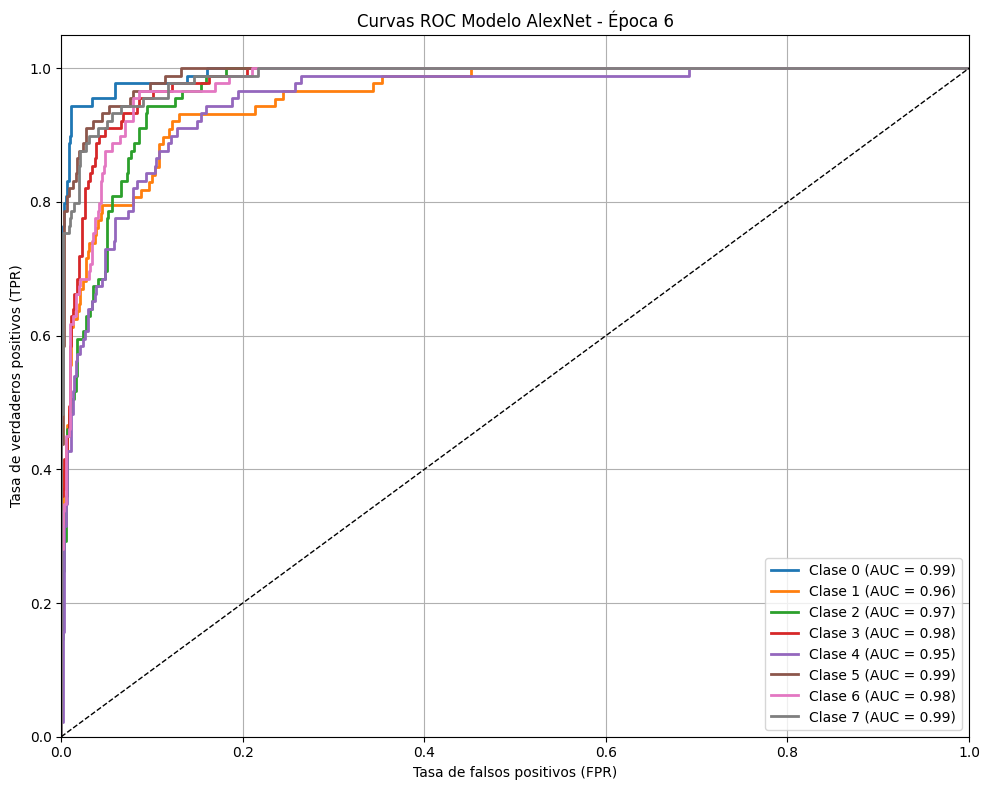

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_labels_alexnet_4b, classes=list(range(num_classes)))
y_score = np.array(prob_alexnet_4b)

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


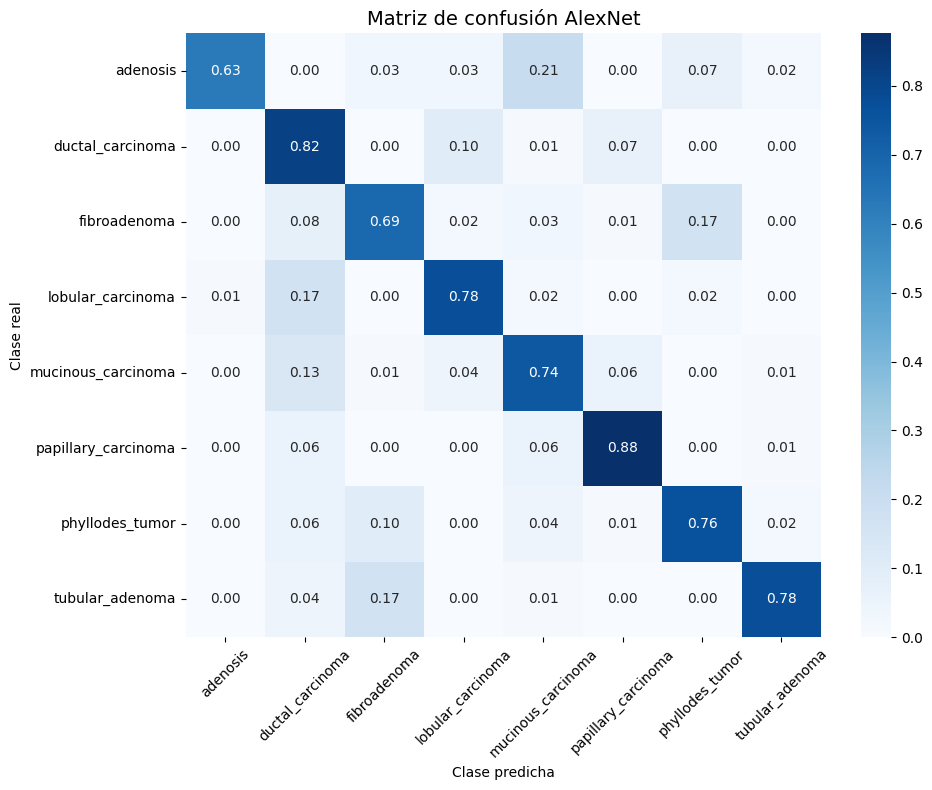

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels_alexnet_4b, pred_labels_alexnet_4b)
cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-6)  # normalizar por fila

# Visualizar matriz normalizada
plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

